In [11]:
import glob 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [28]:
files = sorted(glob.glob(fr'../prts400/*.PRT'))

In [29]:
gas_in_fluid = {}

for filename in files:
    with open(filename) as file:
            value_gas = []
            key_gas =filename.split('_')[-1][:3]
            
            for line in file:
                if 'DISSOLVED' in line:
                        line = file.readline()
                        line = file.readline()
                        if "CURRENTLY IN PLACE" in line:
                            my = float(line.split(':')[-2].split('.')[0])
                            value_gas.append(my)
            gas_in_fluid[key_gas] = value_gas
    file.close()



## График динамики изменения целевого параметра для всех кейсов

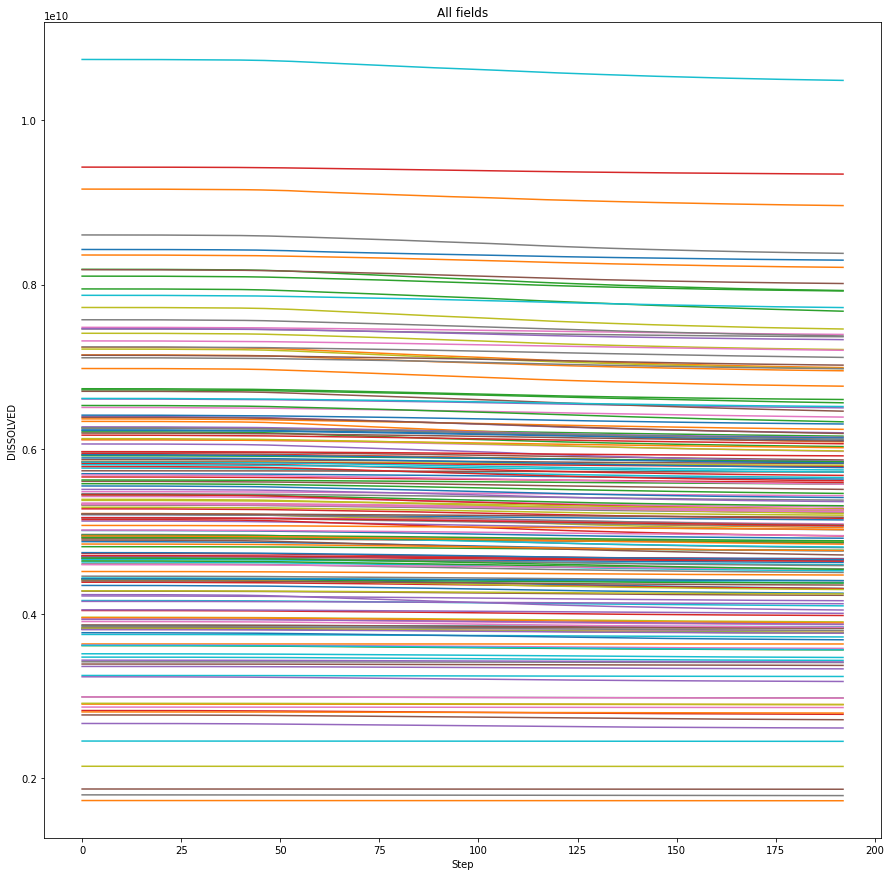

In [30]:
plt.figure(figsize=(15,15))

for i in gas_in_fluid.keys():
    
    y = gas_in_fluid[fr'{i}']
    
    plt.title('All fields')
    plt.ylabel('DISSOLVED')
    plt.xlabel('Step')
    plt.plot(list(range(len(y))),y)

## Анимация динамики изменения целевого параметра для каждого кейса 

MovieWriter imagemagick unavailable; using Pillow instead.


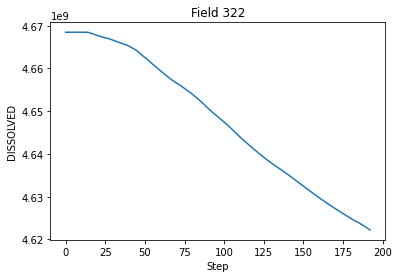

In [32]:
arr = list(gas_in_fluid.keys())
fig, ax = plt.subplots()
arr = list(gas_in_fluid.keys())

def animate(i):
    value_y = gas_in_fluid[fr'{arr[i]}']
    value_x = list(range(len(value_y)))

    ax.clear()
    ax.plot(value_x, value_y)
    plt.ylabel('DISSOLVED')
    plt.xlabel('Step')
    
    ax.set_title(f"Field {arr[i]}")
    
ani = FuncAnimation(fig, animate, frames=len(gas_in_fluid.keys()), interval=200)
ani.save("../result/gas_in_fluid.gif", writer='imagemagick')